In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pbdlib as pbd

%matplotlib inline
%load_ext autoreload
%autoreload 2

from pbdlib.utils.jupyter_utils import *
np.set_printoptions(precision=2)

In [12]:
from scipy.io import loadmat # loading data from matlab

letter = 'C' # choose a letter in the alphabet
datapath = os.path.dirname(pbd.__file__) + '/data/2Dletters/'
data = loadmat(datapath + '%s.mat' % letter)
demos = [d['pos'][0][0].T for d in data['demos'][0]] # cleaning awful matlab data

np.array(demos).shape

(14, 200, 2)

0.001


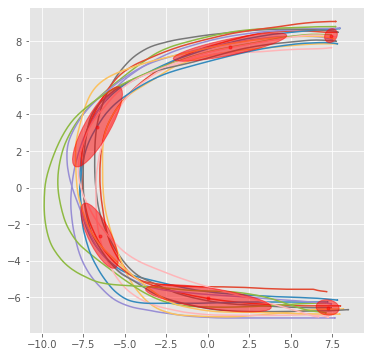

In [46]:
model = pbd.GMM(nb_dim=2, nb_states=6)

data = np.concatenate(demos)
model.em(data=data, reg=1e-3)

plt.figure(figsize=(6, 6))
for p in demos:
    plt.plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model.mu, model.sigma);

(14, 200, 2)
(14, 200, 2)
0.001


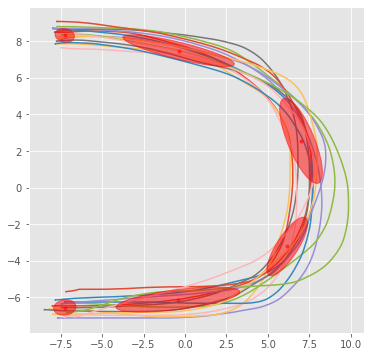

In [26]:
demos_reverse = np.array(demos)
demos_reverse[:, :, 0] = -demos_reverse[:, :, 0]

print(np.array(demos).shape)
print(demos_reverse.shape)

model_reverse = pbd.GMM(nb_dim=2, nb_states=6)

data_reverse = np.concatenate(demos_reverse)
model_reverse.em(data=data_reverse, reg=1e-3)

plt.figure(figsize=(6, 6))
for p in demos_reverse:
    plt.plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model_reverse.mu, model_reverse.sigma)

(500, 2)


(-10.0, 10.0)

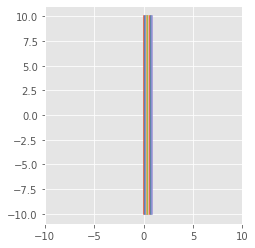

In [38]:
# Generate data

N = 500
data = []
for i in range(10):
    x = np.ones(N).reshape((-1, 1))* i /10.0
    y = np.linspace(-10., 10., N).reshape((-1, 1))
    data.append(np.hstack((x, y)))
print(data[0].shape)

fig,ax = plt.subplots()
for i in range(len(data)):
    ax.plot(data[i][:, 0], data[i][:, 1])
ax.set_aspect('equal', 'box')
ax.set_xlim(-10, 10)
# fig.tight_layout()